# Machine Learning @ UWr 2022

**Lecture 02**

## Our first ML model: K Nearest Neighbors

In [87]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.
!pip install -q gdown httpimport
![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz

import numpy as np
with np.load('mnist.npz') as data:
    X_trn = data['train_data'][:1000].astype(float)
    y_trn = data['train_labels'][:1000]
    X_tst = data['train_data'][1000:1500].astype(float)
    y_tst = data['train_labels'][1000:1500]

We've already seen that K Nearest Neighbors model can quite nicely predict the digits in MNIST. So let's describe the actual algorithm in detail.

In the simplest case $K$ is equal to 1, and we talk about the 1-Nearest Neighbor algorithm. The algorithm couldn't be any simpler:

<code>
def model.fit(X_train):
    just remember X_train
    
def model.predict(x):
    find sample x' in X_train that is closest to x
    return the label of x'
</code>

So how does it work for MNIST? How do we measure similarity between images?
In the simplest possible way.


Just take an image 

In [88]:
import matplotlib.pyplot as plt

def plot_digit(x):
    fig = plt.figure(figsize = (2,2))
    plt.imshow(x, cmap='gray')
    plt.show()


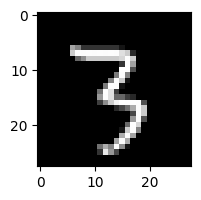

Label: 3


In [89]:
plot_digit(X_trn[44])
print("Label:", y_trn[44])

Which is of size $28 \times 28$ and flatten it into a vector of size $28\cdot 28=784$:

In [90]:
X_trn[44].flatten()

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

The above doesn't really look like image anymore. Although --- just a note --- the below still reasonably represents 3.

In [91]:
for r in range(28):
    for c in range(28):
        print(1 if X_train[44,r,c] > 0 else 0, end="")
    print()

0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000001111111111000000000000
0000001111111111110000000000
0000000111111111110000000000
0000000000000001110000000000
0000000000000001110000000000
0000000000000011100000000000
0000000000000111100000000000
0000000000001111000000000000
0000000000011110000000000000
0000000000011111110000000000
0000000000011111111100000000
0000000000000011111100000000
0000000000000000011100000000
0000000000000000011100000000
0000000000000000111000000000
0000000000000001111000000000
0000000000000001110000000000
0000000000000011100000000000
0000000000011111100000000000
0000000000011110000000000000
0000000000000000000000000000
0000000000000000000000000000


Getting back. Once we deal with vectors, we can just measure the distance between to vector images $x,y$ simply by a Euclidean distance: $\mbox{d}(x,y) = \sqrt{\sum_{i=1}^{784} (x_i - y_i)^2}$.

Ok, so does it actually work? Let's find out. Let's take sample `X_tst[22]` (and see how it looks), and let's find the closest `X_trn[?]` sample.

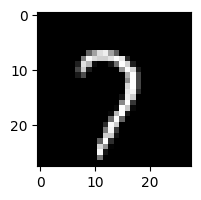

Label: 7


In [122]:
idx_sample = 22
plot_digit(X_tst[idx_sample])
print("Label:", y_tst[idx_sample])

In [123]:
closest_trn_sample_idx = ((X_trn - X_tst[idx_sample])**2).sum(axis=(1,2)).argmin()
closest_trn_sample_idx

258

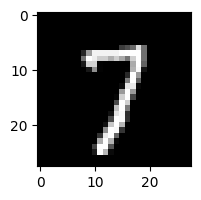

Label: 7


In [124]:
plot_digit(X_trn[closest_trn_sample_idx])
print("Label:", y_trn[closest_trn_sample_idx])

### k-Nearest Neighbors for k > 1

The whole idea behind general $k$ is to take the $k$-closest points, and pick the label which is the most frequent among them:

<code>
def model.fit(X_train):
    just remember X_train
    
def model.predict(x):
    find samples x_1, x_2,...,x_k in X_train that are closest to x
    return the most frequent label among x_1, ..., x_k
</code>

Just look at the top 20 images closest to `X_tst[22]` to see why it makes sense:

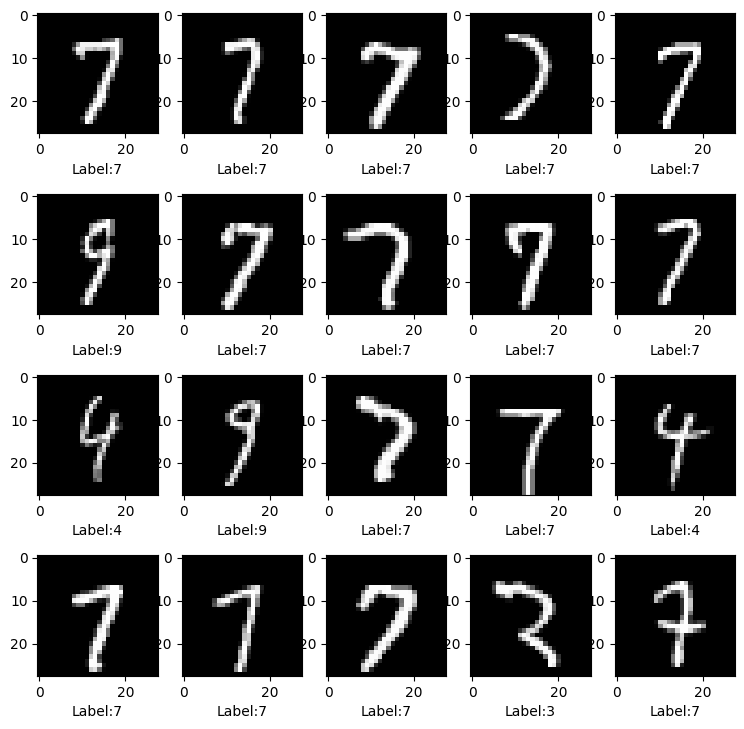

In [131]:
plt.figure(figsize=(9, 9))
i = 0
for idx in ((X_trn - X_tst[idx_sample])**2).sum(axis=(1,2)).argsort()[:20]:
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_trn[idx], cmap='gray')
    plt.xlabel("Label:"+ str(y_trn[idx]))
    i = i + 1

Majority of the numbers in fact is 7 as desired. And for the one which are incorrect you can try to argue that they somehow resemble a 7.

## k-Nearest Neighbors on Iris, visualization

In [134]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.model_selection
import sklearn.datasets
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.neighbors

iris = sklearn.datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Categorical(iris.target_names[iris.target])
iris_df.loc[[0,1,50,51,100,101]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica


We will want to visualize how the model performs. We will use only on two features: petal length and sepal lentgh.

In [133]:
feature_cols = ['petal length (cm)', 'sepal length (cm)']
target_col = 'target'

To classify a sample the `sklearn.neighbors.KNeighborsClassifier` works as follows:
1. it computes the distance from the sample to all training data samples
2. it choses `k` closest ones
3. chosen neighbors vote on the classification.

The `k` parameter is very important, as we will see it controls how smooth is the decision boundary of the classifier. Thus, we will choose the best one using our development set.

/Users/marek-ext/ml_uwr_22/uwr_venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/marek-ext/ml_uwr_22/uwr_venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/marek-ext/ml_uwr_22/uwr_venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/marek-ext/ml_uwr_22/uwr_venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/marek-ext/ml_uwr_22/uwr_venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

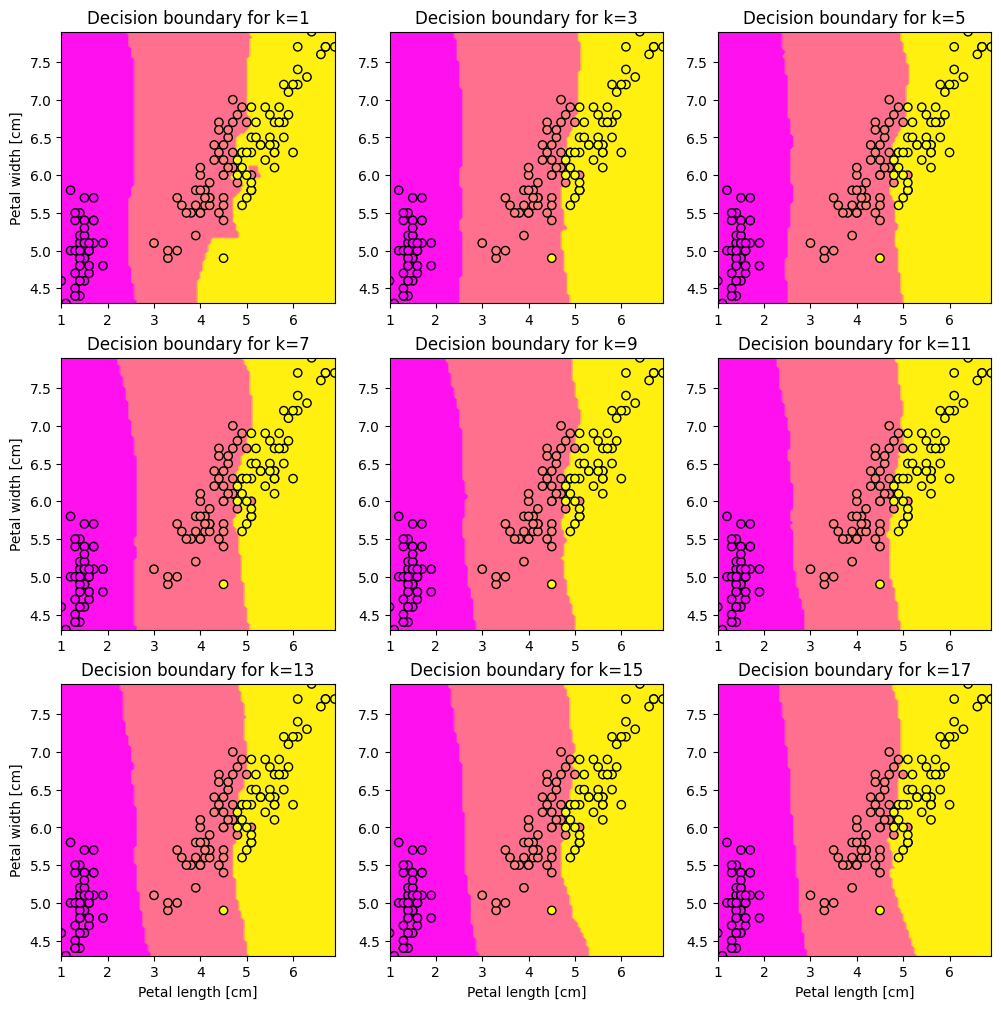

In [139]:
# The mesh will list all points on a MESH_SIZE x MESH_SIZE grid
# We will classify them to deomnstrate how the model wirks on points
# outside the training dataset
MESH_SIZE = 100
mesh_x, mesh_y = np.meshgrid(
    np.linspace(iris_df[feature_cols[0]].min(), iris_df[feature_cols[0]].max(), MESH_SIZE),
    np.linspace(iris_df[feature_cols[1]].min(), iris_df[feature_cols[1]].max(), MESH_SIZE),
)
mesh = np.hstack([mesh_x.reshape(-1, 1), mesh_y.reshape(-1, 1)])

# Results will contain a table of number of neighbors and model accuracies 
results = []

plt.figure(figsize=(12, 12))
# Finally, in a loop we run the model with various settings of the n_neighbors hyper-parameter
for i, n_neighbors in enumerate([1, 3, 5, 7, 9, 11, 13, 15, 17]):
    # First, fit the model. For a nearest neoghbors model, this merely remebers the training datasset
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(iris_df[feature_cols], iris_df[target_col])
    
    # Now apply the model to development data and ecord the accuracy
    train_predictions = model.predict(iris_df[feature_cols])
    train_accuracy = sklearn.metrics.accuracy_score(iris_df[target_col], train_predictions)
    
    
    # Finally, plot the decision boundary
    mesh_predictions = model.predict(mesh)
    # now encode the predictions as a categorical variable, using the same dictionary of categories
    mesh_predictions = pd.Categorical(mesh_predictions, categories=iris_df[target_col].cat.categories)
    # the `.cat.codes` property of a categorical dataframe column changes the string values into integers
    # plt.figure(facecolor='w')
    plt.subplot(3, 3, i + 1)
    plt.title(f"Decision boundary for k={n_neighbors}")
    plt.contourf(mesh_x, mesh_y, mesh_predictions.codes.reshape(mesh_x.shape), cmap='spring')
    plt.scatter(iris_df[feature_cols[0]], iris_df[feature_cols[1]], c=iris_df[target_col].cat.codes, 
                cmap='spring', linewidths=1, edgecolors='black')
    if i >= 6:
        plt.xlabel('Petal length [cm]')
    if i % 3 == 0:
        plt.ylabel('Petal width [cm]')

plt.axis('tight')

# Construct a pd.DataFrame out of our results list, it will be easier to analyse it
results_df = pd.DataFrame(results)

We can see that the `k` parameter has a large influence on the boundary: the higher it is,
the smoother the boundary. 

In the next lecture (and in the homework) we will see how to choose `k` correctly.